In [438]:
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_covtype
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

## Ejercicio 1
Imprime por pantalla tu nombre, apellido y email

In [439]:
# Resuelve en esta celda el ejercicio 1
print("David Saavedra Varela", "okcee@hotmail.com")

David Saavedra Varela okcee@hotmail.com


## Ejercicio 2

### Ejercicio 2.1
Muestra los primeros registros del siguiente conjunto de datos

In [440]:
# Cargar el dataset "titanic" de seaborn
df = sns.load_dataset("titanic")

# Resolver aqui el ejercicio 2.1
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Ejercicio 2.2
Muestra una descripción general del conjunto de datos cargado en el ejercicio 2.1

In [441]:
# Resuelve aqui el ejercicio 2.2
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### Ejercicio 2.3
Elimina los datos de la columna "deck" y sustituye los datos nulos para la columno "age" con el valor medio. Luego muestra el dataframe:

In [442]:
# Resuelve aqui el ejercicio 2.3
df.drop("deck", axis=1, inplace=True) # Borrar columna "deck"
valor_medio = df["age"].mean()
df["age"].fillna(value=valor_medio)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


#### Ejercicio 2.4
Crea un gráfico de tipo histograma que represente la distribución de las edades de los pasajeros. Usa **matplotlib** o **seaborn** como herramientas de visualización

<Axes: xlabel='age', ylabel='Count'>

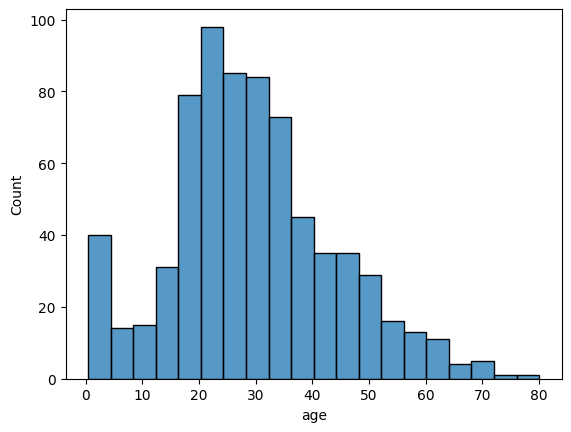

In [443]:
# Resuelve aqui el ejercicio 2.4
sns.histplot(df['age']) # Sobre la columna "ages" creamos un gráfico tipo histograma

#### Ejercicio 2.5
Crea un gráfico circular que represente la distribución por género de los pasajeros. Usa **matplotlib** o **seaborn** como herramientas de visualización

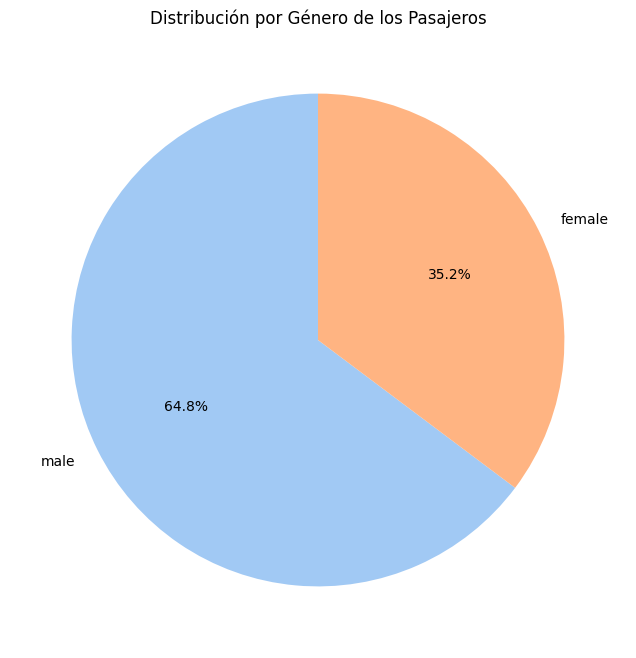

In [444]:
# Resuelve aqui el ejercicio 2.5
import matplotlib.pyplot as plt
gender_counts = df['sex'].value_counts() # Contar la frecuencia de cada género en la columna 'sex'

colores_seaborn = sns.color_palette('pastel') # Selección de colores para el gráfico

plt.figure(figsize=(8, 8)) # Ajusta el tamaño para que el círculo se vea bien
plt.pie(
    gender_counts,
    labels=gender_counts.index,   # Etiquetas para cada porción (male, female)
    autopct='%1.1f%%',            # Formato para mostrar el porcentaje en cada porción
    startangle=90,                # Inicia la primera porción en la parte superior
    colors=colores_seaborn        # Aplica la paleta de colores de Seaborn
)
plt.title('Distribución por Género de los Pasajeros')
plt.ylabel('') # Para evitar que Matplotlib ponga 'sex' como etiqueta del eje Y
plt.show()

## Ejercicio 3

#### Ejercicio 3.1
Separa el dataset en dos variables, 'x' e 'y'.
 - La variable 'x' debe incluir las columnas 'depth', 'table', 'price', 'x', 'y' y 'z'.
 - La variable 'y' debe incluir la columna 'carat'.

In [445]:
# Carga el dataset "diamonds" de seaborn
diamantes = sns.load_dataset("diamonds")
diamantes.head()

# Resuelve aqui el ejercicio 3.1
columnas_x = ['depth', 'table', 'price', 'x', 'y', 'z']
x = diamantes[columnas_x]
y = diamantes['carat']

#### Ejercicio 3.2
Separa el dataset provisto en conjunto de entrenamiento y de test, dando un 40% de los datos al conjunto de test

In [446]:
# Resuelve aqui el ejercicio 3.2
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

#### Ejercicio 3.3
Crea un modelo de regresión lineal y entrenalo con los conjuntos de datos separados en el ejercicio anterior. La variable objetivo corresponde a la columna 'carat'

In [447]:
# Resuelve aqui el ejercicio 3.3
lrm = LinearRegression()  # Creamos una variable que será una instancia de LinearRegression()
lrm.fit(X_train, y_train) # Proceso de entrenamiento

LinearRegression()

#### Ejercicio 3.4
Utiliza el modelo entrenado en el apartado anterior para predecir los valores de la columna 'carat'

In [448]:
# Resuelve aqui el ejercicio 3.3
predicciones = lrm.predict(X_test) # Creamos una variable para sacar el valor objetivo de cada una de ellas
predicciones

array([0.14346117, 0.61704432, 0.40518998, ..., 0.27495771, 0.12391246,
       0.74458284], shape=(21576,))

### Ejercicio 4

#### Ejercicio 4.1
Muestra un resumen estadístico de los datos numéricos del dataset provisto

In [449]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# ALTERNATIVA CON OTRO DATASET 
# Cargar el dataset "titanic" de seaborn
# df = sns.load_dataset("titanic")

# Resuelve aqui el ejercicio 4.1


#### Ejercicio 4.2
Separa el dataset provisto en conjunto de entrenamiento y de test, dando un 40% de los datos al conjunto de test

In [450]:
# Resuelve aqui el ejercicio 4.2


#### Ejercicio 4.3
Crea un modelo de regresión logística y entrenalo con los conjuntos de datos separados en el ejercicio anterior. 

In [451]:
# Resuelve aqui el ejercicio 4.3


#### Ejercicio 4.4
Utiliza el modelo entrenado en el apartado anterior para predecir los valores de la variable objetivo. 

In [452]:
# Resuelve aqui el ejercicio 4.4


### Ejercicio 5

#### Ejercicio 5.1
Muestra los primeros registros del siguiente conjunto de datos

In [453]:
df = sns.load_dataset("penguins")
# Resuelve aqui el ejercicio 5.1


#### Ejercicio 5.2
Separa el dataset provisto en conjunto de entrenamiento y de test, dando un 40% de los datos al conjunto de test. La variable objetivo corresponde a la columna "species"

In [454]:
# Resuelve aquí el ejericio 5.2


#### Ejercicio 5.3
Elige un modelo de clasificación entre los siguientes: 
 - Decision tree (Árbol de decisión)
 - Random forest
 - SVM (Support Vector Machine)
 
Entrenalo con los conjuntos de datos separados en el ejercicio anterior. 

In [455]:
# Resuelve aquí el ejericio 5.3


#### Ejercicio 5.4
Utiliza el modelo entrenado en el apartado anterior para predecir los valores de la variable objetivo. 

In [456]:
# Resuelve aquí el ejericio 5.4


### Ejercicio 6

#### Ejercicio 6.1
Muestra un resumen estadístico de los datos numéricos del dataset provisto

In [457]:
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
df = pd.read_csv(url, header=None)
df.columns = [
   "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]
df = df.drop("Sex", axis=1)

# Resuelve aqui el ejercicio 6.1


#### Ejercicio 6.2
Separa el conjunto de datos en variables 'x' e 'y', donde la 'y' corresponde a la variable objetivo 'Sex'.

In [458]:
# Resuelve aqui el ejercicio 6.2


#### Ejercicio 6.3
Separa el dataset provisto en conjunto de entrenamiento y de test, dando un 40% de los datos al conjunto de test. 

In [459]:
# Resuelve aquí el ejercicio 6.3


#### Ejercicio 6.4
Crea un modelo de regresión logística y entrenalo con los conjuntos de datos separados en el ejercicio anterior. Utiliza el valor 3 para el parámetro 'n_neighbors'

In [460]:
# Resuelve aquí el ejercicio 6.4


#### Ejercicio 6.5
Muestra la matriz de confusión resultante para la salida del ejercicio anterior

In [461]:
# Resuelve aquí el ejercicio 6.5
